In [2]:
from PIL import Image
import numpy as np
import pandas as pd

def convert(img_path):
    
    image = Image.open(img_path)
    image = image.convert("RGB")
    
    image_array = np.array(image)
    
    dataset = []
    
    for i in range(len(image_array)):
        for j in range(len(image_array[i])):
            
            pixel = image_array[i][j]
            
            if not np.array_equal(pixel, [0,0,0]):  
                if pixel[0] == 255 and pixel[1] == 242:
                    dataset.append((j, 500 - i, 1))
                elif pixel[0] == 111 and pixel[1] == 49:
                    dataset.append((j, 500 - i, 0))
                elif pixel[0] == 34 and pixel[1] == 177:
                    dataset.append((j, 500 - i, 2))
                elif pixel[0] == 255 and pixel[1] == 249:
                    dataset.append((j, 500 - i, 3))
                elif pixel[0] == 153 and pixel[1] == 0:
                    dataset.append((j, 500 - i, 4))
                elif pixel[0] == 255 and pixel[1] == 194:
                    dataset.append((j, 500 - i, 5))
                elif pixel[0] == 168 and pixel[1] == 230:
                    dataset.append((j, 500 - i, 6))
                elif pixel[0] == 0 and pixel[1] == 183:
                    dataset.append((j, 500 - i, 7))
                elif pixel[0] == 237 and pixel[1] == 28:
                    dataset.append((j, 500 - i, 8))
                elif pixel[0] == 229 and pixel[1] == 170:
                    dataset.append((j, 500 - i, 9))
                else:
                    print(pixel)
                
    dataset = pd.DataFrame(dataset)
    return dataset

img_path = "data.png"

dataset = convert(img_path)

# **Wykres oryginalnych klastrów**

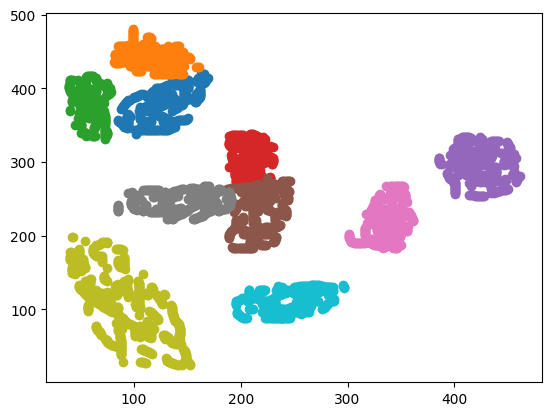

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.scatter(dataset.loc[dataset.iloc[:, 2] == i].iloc[:, 0], dataset.loc[dataset.iloc[:, 2] == i].iloc[:, 1])

plt.show()

In [23]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

data = dataset.iloc[:, :-1]

# **Wykresy metryk dla zadania 1**

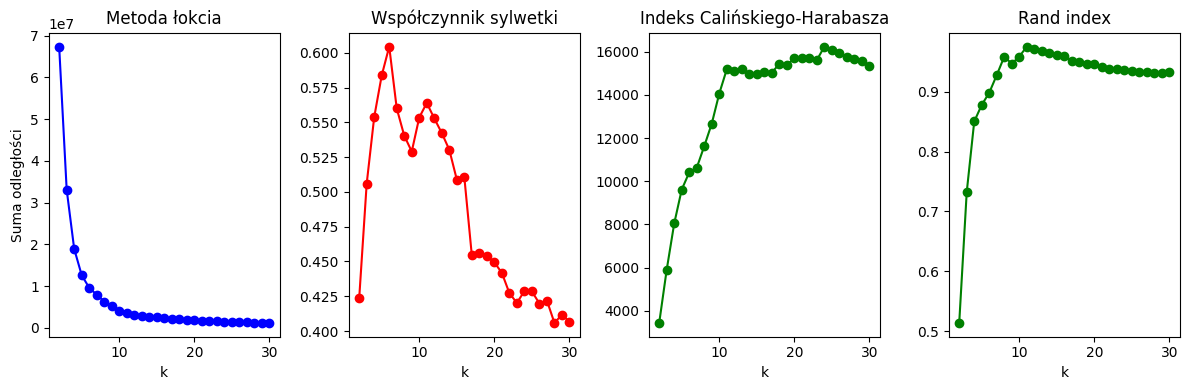

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn import metrics

# Przykładowe dane
# X = np.random.rand(100, 2)

X = data.values
# Zakres rozważanych wartości k
k_values = range(2, 31)

# Listy przechowujące wartości miar jakości dla różnych k
inertia_values = []
silhouette_scores = []
ch_scores = []
labels_pred = []

# Obliczanie miar jakości dla każdego k
for k in k_values:
    # Wielokrotne wykonanie k-means
    kmeans_scores = []

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    kmeans_scores.append(kmeans.inertia_)  # suma kwadratów odległości

    # Obliczanie średniej i odchylenia standardowego
    mean_score = np.mean(kmeans_scores)
    std_score = np.std(kmeans_scores)

    inertia_values.append(mean_score)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    labels_pred.append(metrics.rand_score(cluster_labels, dataset.iloc[:, 2:].values.reshape(4659,)))

# Wykresy zależności miar jakości od k
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('k')
plt.ylabel('Suma odległości')
plt.title('Metoda łokcia')

plt.subplot(1, 4, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.title('Współczynnik sylwetki')

plt.subplot(1, 4, 3)
plt.plot(k_values, ch_scores, 'go-')
plt.xlabel('k')
plt.title('Indeks Calińskiego-Harabasza')

plt.subplot(1, 4, 4)
plt.plot(k_values, labels_pred, 'go-')
plt.xlabel('k')
plt.title('Rand index')

plt.tight_layout()
plt.show()

Miara indeksu calińskiego-Harbasza i random index zachowują się bardzo podobnie i zachowują się prawie zgodnie z rzeczywistością 10 dostaje dobre wyniki ale nie najlepsze. Inne rezultaty daje współczynnik sylwetki dla niego najlepsze dopasowanie jest dla 6 klastrów.
Poniżej jedne z najlepszych wyników dla 6 oraz 11 klastrów.
W rzeczywistości było ich 10.

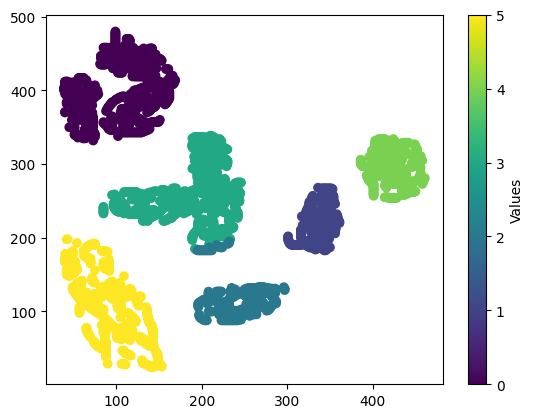

In [19]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10)
cluster_labels = kmeans.fit_predict(data.values)

x = data.iloc[:, :-1].values
y = data.iloc[:, 1:].values

plt.scatter(x, y, c = cluster_labels, cmap='viridis')

cbar = plt.colorbar()
cbar.set_label("Values")
plt.show()

Podział dla 6 wydaje się sensowny pomimo drobnego "dziwnego" przyporządkowanie częsciowo klasy jasno niebieskiej.

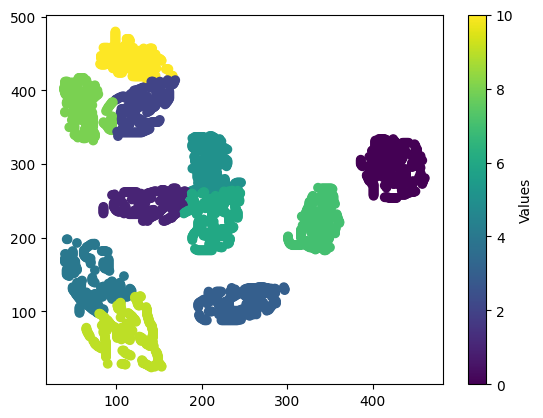

In [20]:
kmeans = KMeans(n_clusters=11, init='k-means++', n_init=10)
cluster_labels = kmeans.fit_predict(data.values)

x = data.iloc[:, :-1].values
y = data.iloc[:, 1:].values

plt.scatter(x, y, c = cluster_labels, cmap='viridis')

cbar = plt.colorbar()
cbar.set_label("Values")
plt.show()

Dla 11 jest prawie idealny w rzeczywistości było 10 klas ale w lewym dolnym rogu jeden duży klaster został rozbity na dwa mniejsze.

# **Zadanie 2**

In [192]:
import numpy as np
from scipy.stats import shapiro
from sklearn.cluster import KMeans
import math


def normality_test(data, alpha=0.05):
    # print(len(data))
    _, p_value = shapiro(data)
    return p_value > alpha

def project_points_onto_line(points, cluster_centers):
    projected_points = []
    m = (cluster_centers[1][1] - cluster_centers[0][1]) / (cluster_centers[1][0] - cluster_centers[0][0])
    c = cluster_centers[0][1] - m * cluster_centers[0][0]

    for i in points:
      num = abs(i[1] - m * i[0] - c)
      den = math.sqrt(1 + m ** 2)
      projected_points.append(num/den)

    return projected_points


def adaptive_cluster_split(X, min_cluster_size=5, alpha=0.05):
    kmeans = KMeans(n_clusters=1, n_init=3)
    kmeans.fit(X)

    res = []
    projected = []

    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    cluster_points = [X[cluster_labels == 0]]
    # print(len(cluster_points[0]))
    points = cluster_points.pop(0)

    sub_kmeans = KMeans(n_clusters=2, n_init=3)
    sub_kmeans.fit(points)
    sub_cluster_centers = sub_kmeans.cluster_centers_
    sub_cluster_labels = sub_kmeans.labels_
    sub_projected = [project_points_onto_line(points[sub_cluster_labels == 0], sub_cluster_centers), project_points_onto_line(points[sub_cluster_labels == 1], sub_cluster_centers)]
    sub_cluster_points = [points[sub_cluster_labels == 0], points[sub_cluster_labels == 1]]

    for sub_points in sub_cluster_points:
        cluster_points.append(sub_points)

    for sub in sub_projected:
      projected.append(sub)

    while len(cluster_points) > 0:
        points = cluster_points.pop(0)
        proj = projected.pop(0)
        # print(len(proj))

        if len(points) < min_cluster_size:
            continue

        if normality_test(proj, alpha):
            # Points follow a normal distribution, no further split needed
            # print("Cluster is normal:", points)
            print(len(points))
            res.append(points)
        else:
            # Split cluster into two subclusters
            # print(len(points))
            sub_kmeans = KMeans(n_clusters=2, n_init=3)
            sub_kmeans.fit(points)
            sub_cluster_centers = sub_kmeans.cluster_centers_
            sub_cluster_labels = sub_kmeans.labels_
            sub_projected = [project_points_onto_line(points[sub_cluster_labels == 0], sub_cluster_centers), project_points_onto_line(points[sub_cluster_labels == 1], sub_cluster_centers)]
            sub_cluster_points = [points[sub_cluster_labels == 0], points[sub_cluster_labels == 1]]

            for sub_points in sub_cluster_points:
                cluster_points.append(sub_points)

            for sub in sub_projected:
                projected.append(sub)

    return np.array(res)


data = dataset.iloc[:, :-1].values
clusters = adaptive_cluster_split(data, min_cluster_size=5, alpha=0.00000000000017)

488
434
375
221
431
596
621
80
164
246
363
355
126
159


<ipython-input-192-8f45ec235228>:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(res)


In [ ]:
for i in clusters:
  print(len(i))

Najbliższy rzeczywistemu wynikowi w przypadku tej metody otrzymywałem dla 8 klastrów jak wykres poniżej. Najczęstsze podziały to k = 8, 12, 14.
W przypadku 10 wyniki były bardzo dziwne wykres drugi. A dla większej liczby klastrów rezultaty też nie były zbyt dobre.
p - value testowałem w granicach od 1 * 10e-13 do do 2 * 10e-13.
Metoda łokciowa dawała lepsze rezultaty dla danego zbioru danych.

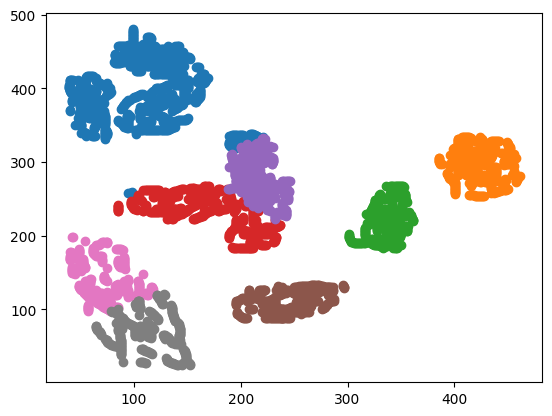

In [177]:
for i in clusters:
  x = np.array(i)
  plt.scatter(x[:, 0], x[:, 1])

plt.show()

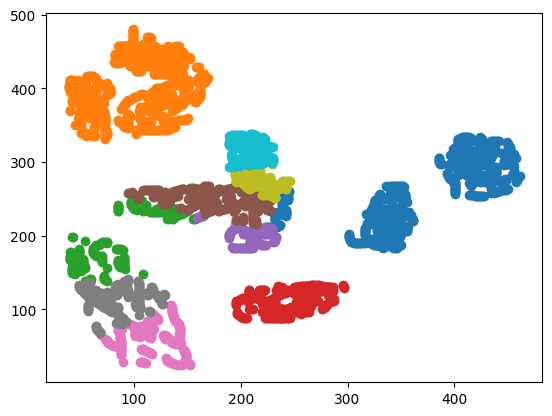

In [179]:
for i in clusters:
  x = np.array(i)
  plt.scatter(x[:, 0], x[:, 1])

plt.show()

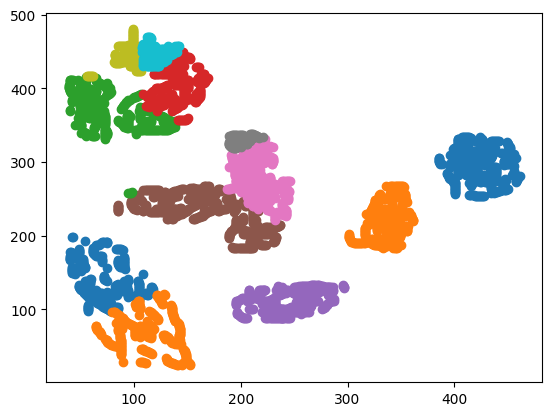

In [193]:
for i in clusters:
  x = np.array(i)
  plt.scatter(x[:, 0], x[:, 1])

plt.show()

# **Zadanie 3**

## Metoda łokciowa

In [217]:
data = pd.read_csv('Fifa 23 Players Data.csv')
data_all = pd.read_csv('Fifa 23 Players Data.csv')

In [255]:
data.head

<bound method NDFrame.head of              Known As           Full Name  Overall  Potential  Value(in Euro)  \
0            L. Messi        Lionel Messi       91         91        54000000   
1          K. Benzema       Karim Benzema       91         91        64000000   
2      R. Lewandowski  Robert Lewandowski       91         91        84000000   
3        K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4           K. Mbappé       Kylian Mbappé       91         95       190500000   
...               ...                 ...      ...        ...             ...   
18534      D. Collins      Darren Collins       47         56          110000   
18535    Yang Dejiang        Dejiang Yang       47         57           90000   
18536       L. Mullan         Liam Mullan       47         67          130000   
18537    D. McCallion    Daithí McCallion       47         61          100000   
18538        N. Rabha         Nabin Rabha       47         50           60000  

In [256]:
data.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [257]:
columns_to_drop = ['Known As', 'Full Name', 'Value(in Euro)', 'Positions Played', 'Best Position',
                   'Nationality', 'Image Link', 'TotalStats', 'BaseStats', 'Club Name', 'Wage(in Euro)',
                   'Release Clause', 'Club Position', 'Contract Until', 'Club Jersey Number', 'Joined On',
                   'On Loan', 'Preferred Foot', 'Weak Foot Rating', 'Skill Moves', 'International Reputation',
                   'National Team Name', 'National Team Image Link', 'National Team Position',
                   'National Team Jersey Number', 'Attacking Work Rate', 'Defensive Work Rate',
                   'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total',
                   'Physicality Total', 'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating',
                   'RW Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating',
                   'CDM Rating', 'RWB Rating', 'LB Rating', 'CB Rating', 'RB Rating', 'GK Rating']

data2 = data.drop(columns_to_drop, axis=1)

Zostawiamy do klasteryzacji poniższe kolumny.

In [258]:
data2.columns

Index(['Overall', 'Potential', 'Age', 'Height(in cm)', 'Weight(in kg)',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes'],
      dtype='object')

In [259]:
data = data2.dropna()
data.head

<bound method NDFrame.head of        Overall  Potential  Age  Height(in cm)  Weight(in kg)  Crossing  \
0           91         91   35            169             67        84   
1           91         91   34            185             81        75   
2           91         91   33            185             81        71   
3           91         91   31            181             70        94   
4           91         95   23            182             73        78   
...        ...        ...  ...            ...            ...       ...   
18534       47         56   21            174             68        40   
18535       47         57   17            175             60        34   
18536       47         67   18            170             65        41   
18537       47         61   17            178             65        21   
18538       47         50   25            176             66        38   

       Finishing  Heading Accuracy  Short Passing  Volleys  ...  Penalties  \
0  

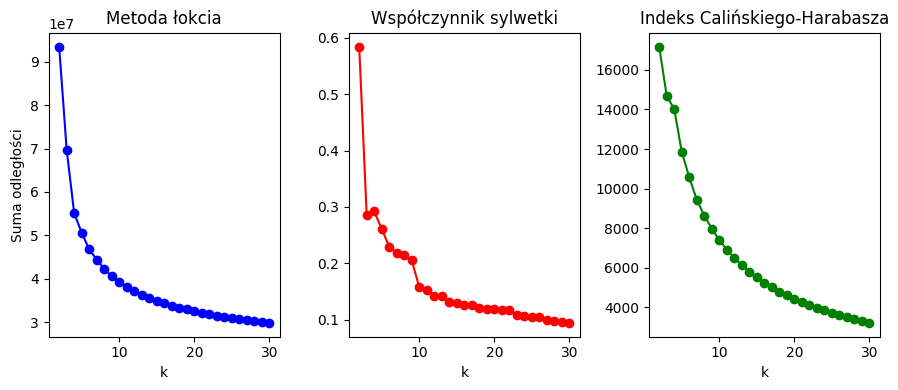

In [207]:
X = data.values
# Zakres rozważanych wartości k
k_values = range(2, 31)

# Listy przechowujące wartości miar jakości dla różnych k
inertia_values = []
silhouette_scores = []
ch_scores = []

# Obliczanie miar jakości dla każdego k
for k in k_values:
    # Wielokrotne wykonanie k-means
    kmeans_scores = []

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    kmeans_scores.append(kmeans.inertia_)  # suma kwadratów odległości

    # Obliczanie średniej i odchylenia standardowego
    mean_score = np.mean(kmeans_scores)
    std_score = np.std(kmeans_scores)

    inertia_values.append(mean_score)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))

# Wykresy zależności miar jakości od k
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('k')
plt.ylabel('Suma odległości')
plt.title('Metoda łokcia')

plt.subplot(1, 4, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.title('Współczynnik sylwetki')

plt.subplot(1, 4, 3)
plt.plot(k_values, ch_scores, 'go-')
plt.xlabel('k')
plt.title('Indeks Calińskiego-Harabasza')

plt.tight_layout()
plt.show()

In [253]:
k = 11
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
cluster_labels = kmeans.fit_predict(X)

In [254]:
new = data_all
new["cluster_labels"] = cluster_labels


for i in range(k):
  tmp = new.loc[new.iloc[:, -1] == i]
  print(tmp['Best Position'])

6        GK
7        GK
14       GK
16       GK
18       GK
         ..
17274    GK
17394    GK
17414    GK
17417    GK
17453    GK
Name: Best Position, Length: 1020, dtype: object
3         CM
9         CB
13       CDM
17       CDM
19       CDM
        ... 
10606    CDM
10648     CM
10787     LM
10927     CM
13000     CB
Name: Best Position, Length: 1892, dtype: object
3353      RB
3619      RB
3728     RWB
4141     LWB
4157      LB
        ... 
18530     RM
18531    CDM
18533    CAM
18535    CDM
18538     LB
Name: Best Position, Length: 1991, dtype: object
45       ST
121      ST
152      ST
166      ST
176      ST
         ..
15456    ST
15492    ST
15573    ST
15620    ST
16063    ST
Name: Best Position, Length: 1431, dtype: object
507      CB
844      CB
1037     CB
1175     CB
1309     CB
         ..
18493    CB
18496    CB
18505    CB
18512    CB
18537    CB
Name: Best Position, Length: 1836, dtype: object
771       RB
838       RB
1128      RB
1298      LB
1326      LB
        

Dla liczby klastrów około 10 widać że klasteryzacja jest nie najgorsza. Patrząc na pozycję zawodników w poszczególnych klastrach są w miarę jednolite, najlepiej klasteryzuje bramkarzy i napastników reszta pozycji jest trochę przemieszana ale też nie jest najgorzej.

## Metoda hierarchiczno-rekurencyjna

In [291]:
import numpy as np
from scipy.stats import shapiro
from sklearn.cluster import KMeans
import math


def normality_test(data, alpha=0.05):
    # print(len(data))
    _, p_value = shapiro(data)
    return p_value > alpha

def project_points_onto_line(points, cluster_centers):
    line_direction = cluster_centers[1] - cluster_centers[0]
    projected_points = []

    for i in points:
      projection = np.dot(i - cluster_centers[0], line_direction) / np.linalg.norm(line_direction)
      projected_points.append(projection)

    return projected_points


def adaptive_cluster_split(X, min_cluster_size=5, alpha=0.05):
    kmeans = KMeans(n_clusters=1, n_init=3)
    kmeans.fit(X)

    res = []
    projected = []

    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    cluster_points = [X[cluster_labels == 0]]
    # print(len(cluster_points[0]))
    points = cluster_points.pop(0)

    sub_kmeans = KMeans(n_clusters=2, n_init=3)
    sub_kmeans.fit(points)
    sub_cluster_centers = sub_kmeans.cluster_centers_
    sub_cluster_labels = sub_kmeans.labels_
    sub_projected = [project_points_onto_line(points[sub_cluster_labels == 0], sub_cluster_centers), project_points_onto_line(points[sub_cluster_labels == 1], sub_cluster_centers)]
    sub_cluster_points = [points[sub_cluster_labels == 0], points[sub_cluster_labels == 1]]

    for sub_points in sub_cluster_points:
        cluster_points.append(sub_points)

    for sub in sub_projected:
      projected.append(sub)

    while len(cluster_points) > 0:
        points = cluster_points.pop(0)
        proj = projected.pop(0)
        # print(len(proj))

        if len(points) < min_cluster_size:
            continue

        if normality_test(proj, alpha):
            # Points follow a normal distribution, no further split needed
            # print("Cluster is normal:", points)
            print(len(points))
            res.append(points)
        else:
            # Split cluster into two subclusters
            # print(len(points))
            sub_kmeans = KMeans(n_clusters=2, n_init=3)
            sub_kmeans.fit(points)
            sub_cluster_centers = sub_kmeans.cluster_centers_
            sub_cluster_labels = sub_kmeans.labels_
            sub_projected = [project_points_onto_line(points[sub_cluster_labels == 0], sub_cluster_centers), project_points_onto_line(points[sub_cluster_labels == 1], sub_cluster_centers)]
            sub_cluster_points = [points[sub_cluster_labels == 0], points[sub_cluster_labels == 1]]

            for sub_points in sub_cluster_points:
                cluster_points.append(sub_points)

            for sub in sub_projected:
                projected.append(sub)

    return np.array(res)

# 0.00000000000017
tmp = data
tmp["idx"] = range(0, len(data))
clusters = adaptive_cluster_split(data.values, min_cluster_size=5, alpha=0.000000000000000017)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


579
580
580
578
579
580
579
579
579
580
581
579
578
581
582
578
579
580
580
580
579
579
580
579
578
579
578
579
579
580
579
579


<ipython-input-291-ebed7d37bb91>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(res)


In [297]:
for i in clusters:
  print("----------  Cluster Overall stat  ---------")
  for idx,j in enumerate(i):
    if idx < 15:
      print(data_all.iloc[j[-1]]["Overall"])
    else:
      break
  

----------  Cluster Overall stat  ---------
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
----------  Cluster Overall stat  ---------
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
----------  Cluster Overall stat  ---------
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
----------  Cluster Overall stat  ---------
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
----------  Cluster Overall stat  ---------
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
----------  Cluster Overall stat  ---------
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
----------  Cluster Overall stat  ---------
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
----------  Cluster Overall stat  ---------
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
----------  Cluster Overall stat  ---------
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
----------  Cluster Overall stat  ---------
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
----------  Cluster Overall stat  ---------
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
----------  Cluster O

Po przeanalizowaniu wyników druga metoda opierała klastrowanie zdaceydowani na podstawie statystyki overall danego zawodnika - patrząc na pozycje brak żadnego schematu. Klastry są dobrze podzielone ale taki podział nie daje ciakwych wyników w porównaniu do poprzedniego klastrowania gdzie na podstawie danych liczbowych zawodnicy dośc dobrze zostali podzieleni na klastry które odpowiadają pozycjom na boisku.